# Paremetrização computacional
A teoria consiste em determinar o versor tangente à curva ($\vec{u}$) em cada ponto de $f(x,y)$. Dado um ponto inicial $\vec{r}_{0}$ e uma evolção temporal $dt$, calcula-se a evolução $d\vec{r} = dt \ \vec{v} = dt \ \lambda \ \vec{u} = dt´ \ \vec{u}$. 


Inicialmente, imaginei calcular o valor de $\lambda$, a norma do vetor velocidade no ponto, a partir de $f(r+dr)=0$. O problema é que $\lambda=0$ é uma solução de rápida convergência, e então não há como evoluir a parametrização. A minha ideia preliminar era a de iterar apenas com $\vec{u}$, mas não fazia sentido para mim evoluir a parametrização sem o cálculo correto da norma do vetor velocidade em cada ponto. Ontem, dia 03/06/2020, eu e o Lucas estudamos esse problema por cerca de três horas e concluimos que a parametrização por $\vec{u}$ era bem-sucedida. Ademais, constatamos que o parâmetro $t$ não variava de $[0,2\pi]$, mas sim de $[0,L]$, onde $L$ é o comprimento da curva. Portanto, tínhamos agora de explicar o porquê de a iconvergência ter sido alcançada. Cheguei à explicação manifestada na equação de evolução do $d\vec{r}$: estamos incorporando o $\lambda$ ao $dt$, gerando um $dt´$. Canonicamente, o $dt$ é mantido fixo e o $dt´$, dependente da primeira quantidade, varia em cada ponto. No entando, a minha implementação considera o $dt´$ fixo (e, portanto, o $dt$ verdadeiro varia em cada ponto). Evidentemente, uma variação do passo temporal não afeta o resultado final da convegência, a não ser que as flutuações de $dt(dt´)= dt´/\lambda $ sejam acentuadas.

Conseguintemente, explica-se facilmente a correlação entre o domínio do parâmetro $t´$ com o $t$: o fato de $dt$ não ser fixo no tempo gera "deformações" na reta real de $t$. Temos acesso apenas à reta real de $t´$, e não é possível calcular devidamente a velocidade $\vec{v}(t)$ (afinal, $\vec{v}(t) = d\vec{r}/dt = \lambda d\vec{r}/dt´$; como o acesso a $\lambda$ é restrito, não há como calcular $\vec{v}$). No entanto, a parte realmente relevante é a que diz respeito ao comprimento da curva. Acompanhe o raciocínio abaixo:

$
\begin{align}
L &= \int |\vec{v}| dt \\
  &= \int \lambda dt\\
  &= \int dt´\\
  &= \Delta t´\\
  &= t´-0\\
L &= t´
\end{align}
$

Imediatamente, isso resolve todos os problemas de cálculo de comprimento de arco. Dado um ponto $(x,y)$, pode-se imediatamente encontrar o seu respectivo $t´$ (e, portanto, o comprimento de arco $L(x,y)$). Lembre-se que estamos considerando $L(\vec{r}_0)=0$, então se certifique de corretamente usar o ponto inicial de iteração.

Abaixo estão algumas funções de localização de raízes providas pelo scipy:

+ scipy.optimize.root
+ scipy.optimize.newton

A primeira opção apresentou resultados melhores em testes preliminares, além de fornecer mais resultados úteis (como o total de convergências e uma verificação final de convergência concluída).

In [10]:
import numpy as np
import scipy.optimize as sciop
import matplotlib.pyplot as plt
import numba
import matplotlib

newparams = {'figure.figsize': (15, 7), 'axes.grid': True,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 300}

matplotlib.rcParams.update(newparams)

In [11]:
def f(x,y,a,b):
    return x**2/a**2+y**2/b**2-1+np.sin(x)
# root é uma função que retorna um dicionário. Use o método get() para recuperar
# os valores das chaves de interesse ("x" e "success")
a=1
b=np.sqrt(2)
sciop.root(f,-a,args=(0,a,b)).x[0]

-1.4096240040025962

In [12]:
def par_vec(r,a,b):
    x,y = r
    u = np.array([-2*y/b**2, 2*x/a**2])
    u = u/np.linalg.norm(u)
    return u

In [21]:
#@numba.njit('void(float64,float64,float64,float64,float64)')
def numeric_parameterization(r0,T,dt,a,b):
    
    file = open('curve_data/data.dat','w')
    #np.savetxt(file, np.array(['x','y','vx','vy','t']).reshape((1,5)) ,header='Dados da parametrização:')
    
    tsim = np.arange(0,T+dt,dt)
    r = r0

    for t in tsim:
        u = par_vec(r,a,b)
        x,y = r
        ux,uy = u
        
        np.savetxt(file,np.array([*r,*u,t]).reshape((1,5)))
        
        r = r+u*dt    
    
    file.close()

In [16]:
%%time
a=1
b=1
r0=np.array([1,0])
dt=1e-4
T=7.6404
numeric_parameterization(r0,T,dt,a,b)

Wall time: 7 s


In [18]:
data_in = np.loadtxt(r'curve_data/data.dat')

In [19]:
x,y,vx,vy,t = np.rollaxis(data_in,1)

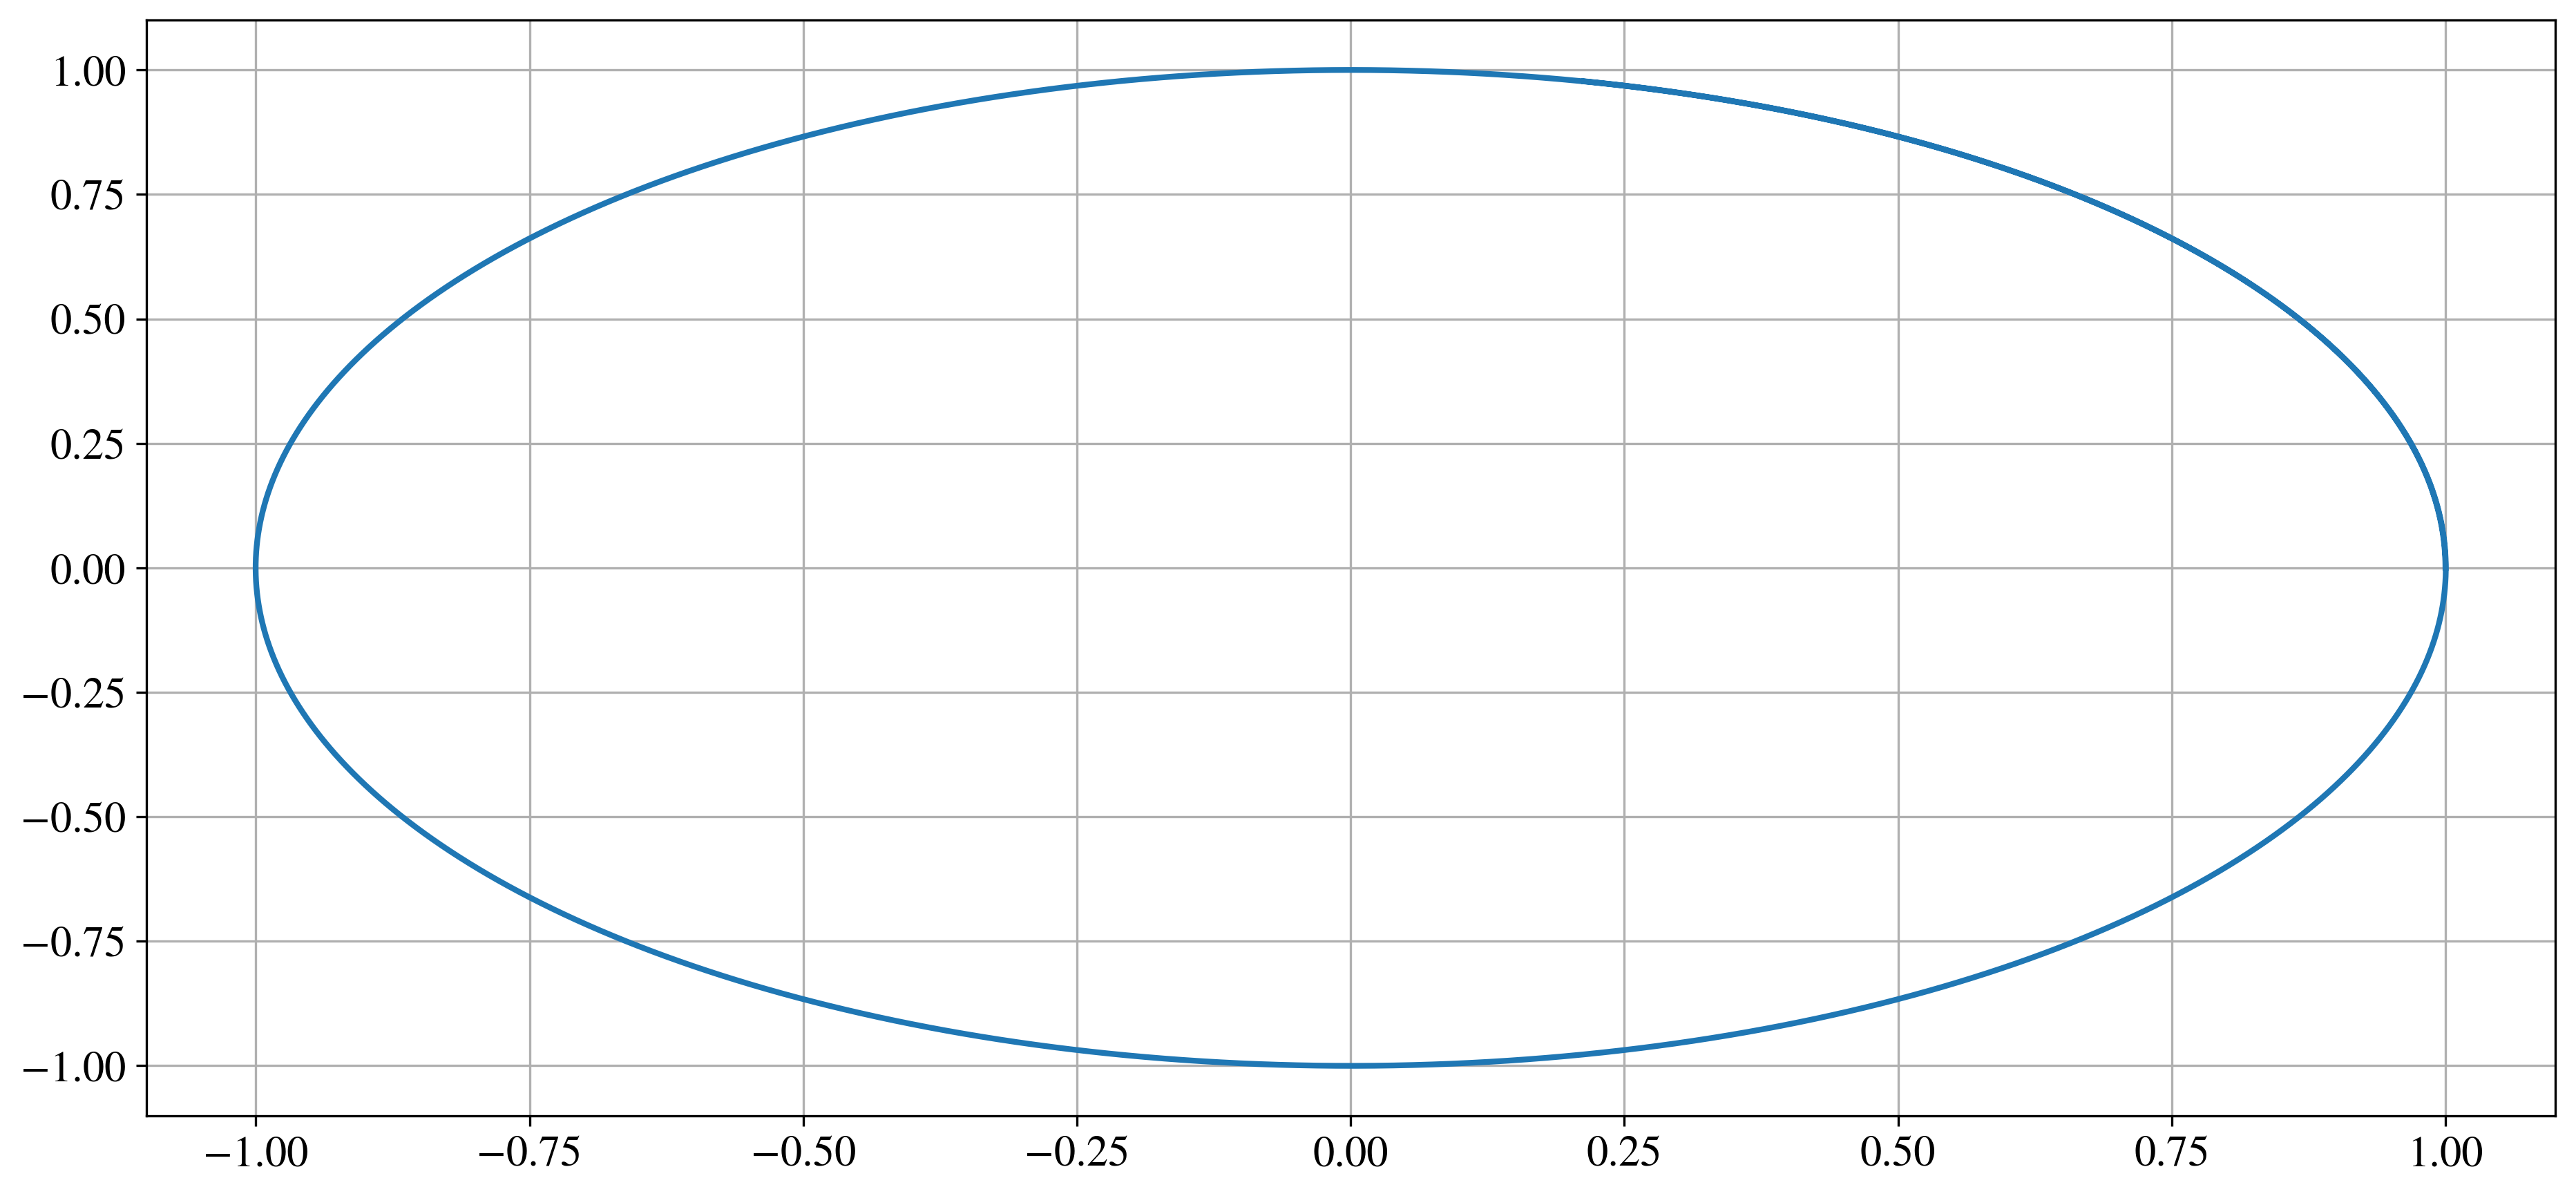

In [20]:
plt.plot(x,y)
# plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('curva.pdf',dpi=300)

In [11]:
np.savetxt(r'./parametr/temp.dat', np.array([x,y]).T)